In [1]:
from google.colab import drive
drive.mount('/content/drive')
!rm -rf /content/sample_data

Mounted at /content/drive


In [ ]:
!nvidia-smi

Fri Aug  2 17:12:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [1]:
!pip install -i https://test.pypi.org/simple/ supervision==0.3.0
!pip install -q transformers
!pip install -q pytorch-lightning
!pip install -q roboflow
!pip install -q timm

Looking in indexes: https://test.pypi.org/simple/
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.5 MB/s eta 0:00:00


In [2]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

import supervision
import transformers
import pytorch_lightning
import roboflow

print(
    "roboflow:", roboflow.__version__,
    "; supervision:", supervision.__version__,
    "; transformers:", transformers.__version__,
    "; pytorch_lightning:", pytorch_lightning.__version__
)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.4 ; cuda:  cu121
roboflow: 1.1.44 ; supervision: 0.3.0 ; transformers: 4.42.4 ; pytorch_lightning: 2.4.0


In [ ]:
# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install required packages
!pip install -r requirements.txt


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/datasets/yolov5
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached triton-2.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.4 MB/s eta 0:00:00
Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
Using cached triton-2.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (168.1 MB)
  Attempting uninstall: triton
    Found existing installation: triton 3.0.0
    Uninstalling triton-3.0.0:
      Successfully uninstalled triton-3.0.0
  Attempting uninstall: nvidia-cudnn-cu12
    Found existing installation: nvidia-cudnn-cu12 9.1.0.70
    Uninstalling nvidia-cudnn-cu12-9.1.0.70:
      Successfully uninstalled nvidia-cudnn-cu12-9.1.0.70
  Attempting uninstall: torch
    Found existing installation: torch 2.4.0
    Uninst

In [ ]:
# Define the updated content for data.yaml
data_yaml = """
train: /content/datasets/Angiographic-Dataset-For-Stenosis-Detection-7/train/images
val: /content/datasets/Angiographic-Dataset-For-Stenosis-Detection-7/valid/images
test: /content/datasets/Angiographic-Dataset-For-Stenosis-Detection-7/test/images

nc: 1
names:
  0: 'stenosis'
"""

# Save it to the YOLOv5 directory
with open('/content/datasets/Angiographic-Dataset-For-Stenosis-Detection-7/data.yaml', 'w') as f:
    f.write(data_yaml)


In [ ]:
import os

# Define the paths
train_images_path = '/content/datasets/Angiographic-Dataset-For-Stenosis-Detection-7/train/images'
val_images_path = '/content/datasets/Angiographic-Dataset-For-Stenosis-Detection-7/valid/images'
test_images_path = '/content/datasets/Angiographic-Dataset-For-Stenosis-Detection-7/test/images'

# List files in each directory
train_images_files = os.listdir(train_images_path)
val_images_files = os.listdir(val_images_path)
test_images_files = os.listdir(test_images_path)

print("Train images files:", len(train_images_files))
print("Val images files:", len(val_images_files))
print("Test images files:", len(test_images_files))


Train images files: 5827
Val images files: 1249
Test images files: 1249


In [ ]:
!python train.py --data /content/datasets/Angiographic-Dataset-For-Stenosis-Detection-7/data.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --batch-size 16 --epochs 50 --name yolov5s_experiment


2024-08-02 17:47:41.248401: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-02 17:47:41.267957: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-02 17:47:41.274237: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/content/datasets/Angiographic-Dataset-For-Stenosis-Detection-7/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, c

In [ ]:
!python val.py --data /content/datasets/Angiographic-Dataset-For-Stenosis-Detection-7/data.yaml --weights runs/train/yolov5s_experiment4/weights/best.pt --batch-size 16 --img-size 640


val: data=/content/datasets/Angiographic-Dataset-For-Stenosis-Detection-7/data.yaml, weights=['runs/train/yolov5s_experiment4/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-350-g6096750f Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/datasets/Angiographic-Dataset-For-Stenosis-Detection-7/valid/labels.cache... 1249 images, 0 backgrounds, 0 corrupt: 100% 1249/1249 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 79/79 [00:19<00:00,  3.99it/s]
                   all       1249       1249      0.957      0.953      0.971      0.451
Sp

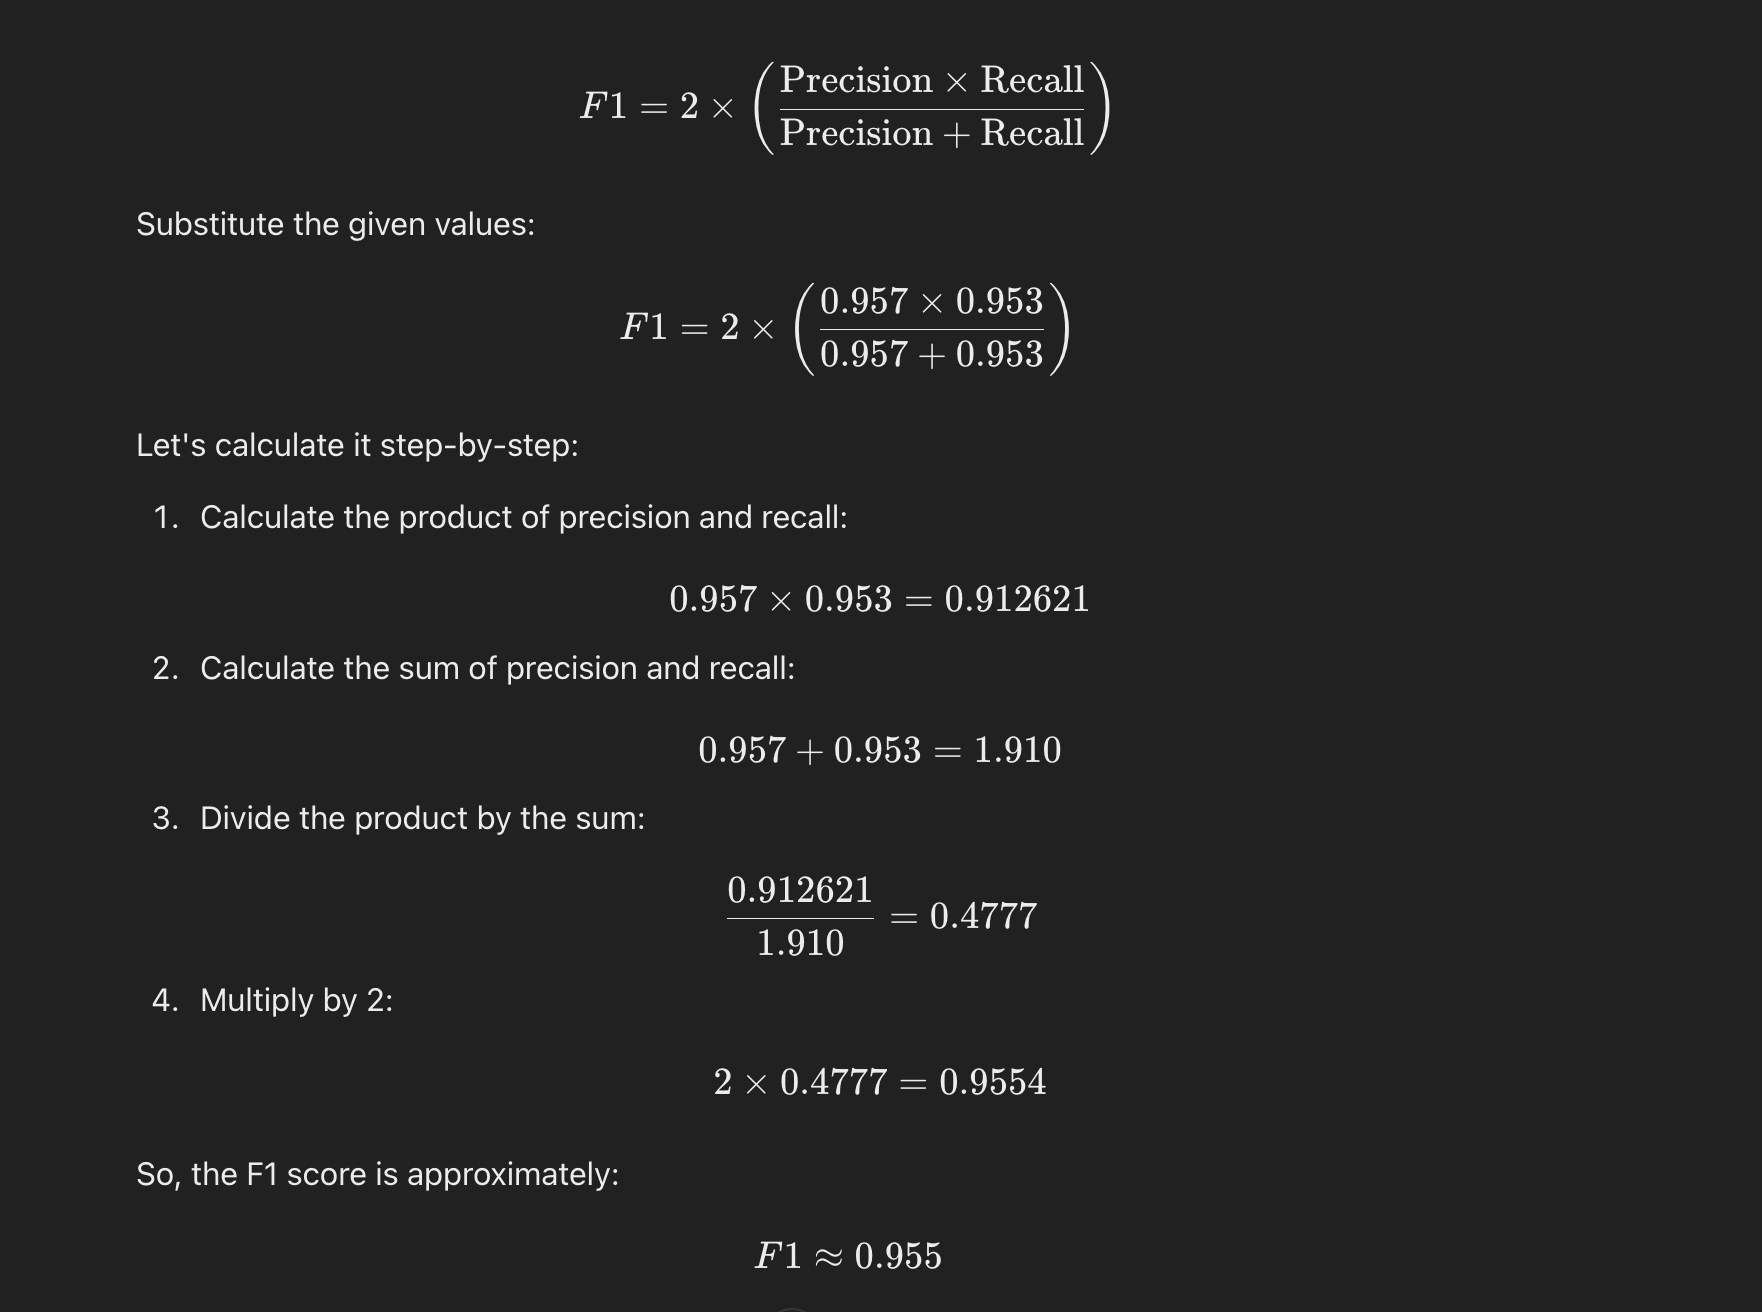

In [ ]:
import json

# Load evaluation results
results_path = '/content/drive/MyDrive/workspace/runs/val/exp/results.txt'

with open(results_path, 'r') as file:
    results = file.read()

print(results)


In [ ]:
# Define the path to your image
image_path = '/content/datasets/Angiographic-Dataset-For-Stenosis-Detection-7/test/images/14_002_5_0025_bmp.rf.8eda6a04ff0d74ceb4c52fa2d05fcdd4.jpg'


In [11]:
!python /content/drive/MyDrive/datasets/yolov5/detect.py --weights /content/drive/MyDrive/datasets/yolov5/runs/train/yolov5s_experiment4/weights/best.pt --img 640 --conf 0.4 --source /content/14_021_34_0018.bmp


detect: weights=['/content/drive/MyDrive/datasets/yolov5/runs/train/yolov5s_experiment4/weights/best.pt'], source=/content/14_021_34_0018.bmp, data=drive/MyDrive/datasets/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/datasets/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-350-g6096750f Python-3.10.12 torch-2.4.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/14_021_34_0018.bmp: 640x640 1 stenosis, 599.8ms
Speed: 4.9ms pre-process, 599.8ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to drive/MyDrive/datasets/yolov5/runs/detect/exp7
